In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from cov import generate
from metric import wasserstein, kr,kl_divergence

In [24]:
res = {"KL":[],"Wasserstein":[],"KR":[]}
nums = [i for i in range(10, 150)]
for num in nums:
    C_m, C_n = generate(num=num)
    res["KL"].append(kl_divergence(C_m, C_n))
    res["Wasserstein"].append(wasserstein(C_m, C_n))
    res["KR"].append(kr(C_m, C_n))

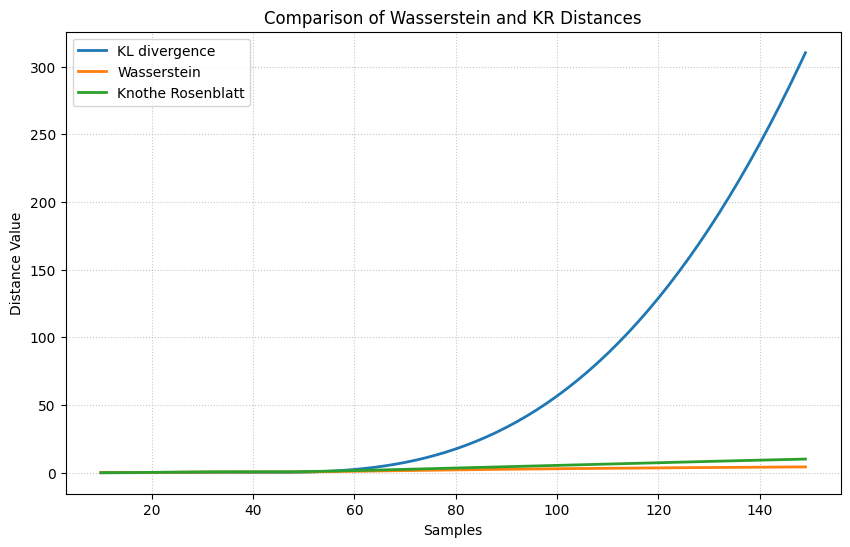

In [25]:
# グラフのサイズを設定（任意）
plt.figure(figsize=(10, 6))
plt.plot(nums, res["KL"], label="KL divergence", linestyle="-", linewidth=2)
plt.plot(nums, res["Wasserstein"], label="Wasserstein", linestyle="-", linewidth=2)
plt.plot(nums, res["KR"], label="Knothe Rosenblatt", linestyle="-", linewidth=2)
plt.xlabel("Samples")
plt.ylabel("Distance Value")
plt.title("Comparison of Wasserstein and KR Distances")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()

In [18]:
kr_res = []
krs_res = []
nums = [i for i in range(10, 150)]
for num in nums:
    C_m, C_n = generate(num=num)
    kr_res.append(kr(C_m, C_n))
    C_m, C_n = generate(num=num,shuffle=True)
    krs_res.append(kr(C_m, C_n))

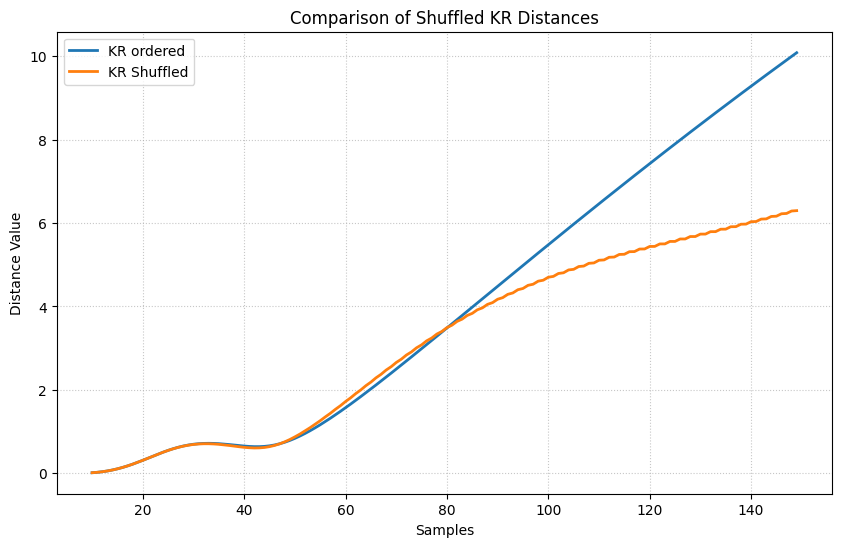

In [19]:
# グラフのサイズを設定（任意）
plt.figure(figsize=(10, 6))
plt.plot(nums, kr_res, label="KR ordered", linestyle="-", linewidth=2)
plt.plot(nums, krs_res, label="KR Shuffled", linestyle="-", linewidth=2)
plt.xlabel("Samples")
plt.ylabel("Distance Value")
plt.title("Comparison of Shuffled KR Distances")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()

In [20]:
w_res = []
ws_res = []
nums = [i for i in range(10, 150)]
for num in nums:
    C_m, C_n = generate(num=num)
    w_res.append(wasserstein(C_m, C_n))
    C_m, C_n = generate(num=num,shuffle=True)
    ws_res.append(wasserstein(C_m, C_n))

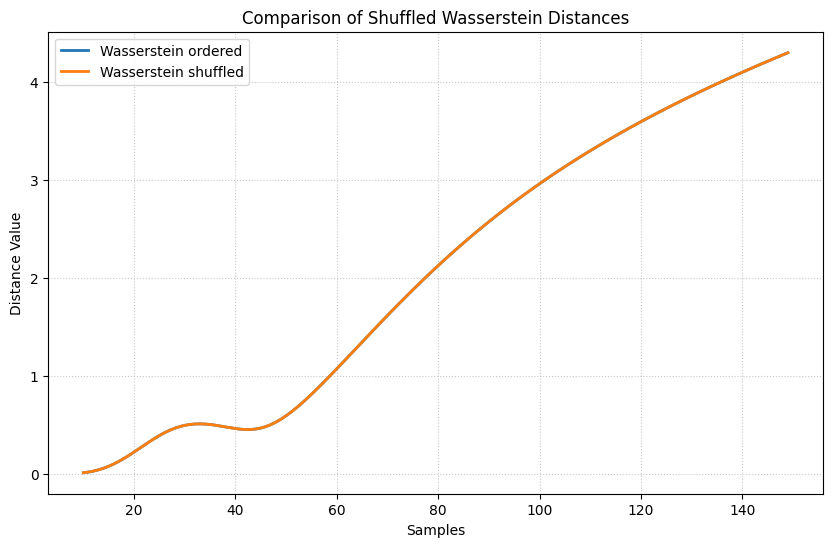

In [21]:
# グラフのサイズを設定（任意）
plt.figure(figsize=(10, 6))
plt.plot(nums, w_res, label="Wasserstein ordered", linestyle="-", linewidth=2)
plt.plot(nums, ws_res, label="Wasserstein shuffled", linestyle="-", linewidth=2)
plt.xlabel("Samples")
plt.ylabel("Distance Value")
plt.title("Comparison of Shuffled Wasserstein Distances")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()

In [22]:
C_m, C_n = generate(num=3)
L = np.linalg.cholesky(C_m)
M = np.linalg.cholesky(C_n)
np.diag(L.T@M)

array([1., 1., 1.])

In [23]:
C_n

array([[1.00000000e+00, 1.38879439e-11, 1.92874985e-22],
       [1.38879439e-11, 1.00000000e+00, 1.38879439e-11],
       [1.92874985e-22, 1.38879439e-11, 1.00000000e+00]])